In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
#from IPython.display import display

In [2]:
sns.set_style("dark")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

# Educação de nível superior no Brasil - Contratos FIES

### Integrantes do Grupo
- Marcos Vinicius Araujo
- Breno Marot
- Gabriel Banaggia


## Primeiros passos 

Este dataset se refere a participantes do programa de Financiamtnso de
Instituições de Ensino Superior (FIES) no Brasil. Estão disponíveis tanto dados
a respeito dos contratos celebrados entre os estudantes e o Governo Federal, 
como suas informações demográficas.

In [3]:
# Lendo o dataset

df = pd.read_csv('.\\data\\education.csv', sep=';', index_col='id_masked')
df.head()

,safra_entrada,dt_nascimento,vl_renda_percapta,vl_renda_familiar_bruta_mensal,nu_percentual_solicitado,sexo,ds_raca_cor,ds_estado_civil,sg_uf_curso,no_municipio_curso,no_curso,co_curso,ultimo_aditamento,tipo_ultimo_aditamento,qtd_cursada_total,qt_semestre_financiamento,semestre_encerramento,banco,st_fase_contrato,vl_total_liberado,vl_saldo_devedor,nu_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada
id_masked,,,,,,,,,,,,,,,,,,,,,,,,
654,"2013,5",1983-11-10,"356,00","1068,00","100,00",F,BRANCO,DIVORCIADO,MS,DOURADOS,ADMINISTRACAO,54656.000,20140.000,Encerramento,2.000,2.000,12014.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,"2014,0",1983-07-01,"1916,85","1916,85","100,00",F,PARDO,CASADO,MA,SAO LUIS,ENFERMAGEM,96713.000,201500.000,Encerramento,2.000,2.000,22015.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,"2013,5",1989-12-07,"2700,00","2700,00","100,00",F,NEGRO,SOLTEIRO,RO,CACOAL,DIREITO,49820.000,201700.000,Renovacao,10.000,10.000,NaN,BB,A,"57902,67","55726,23",0.000,"0,00",NaN
2214,"2012,5",1979-10-08,"272,99","818,98","100,00",F,PARDO,SOLTEIRO,SE,ARACAJU,ENFERMAGEM,118882.000,201600.000,Renovacao,10.000,10.000,NaN,CX,A,"56159,08","64236,79",1025.000,"14170,86",NaN
2298,"2013,0",1989-04-09,"1200,00","1200,00","100,00",F,PARDO,CASADO,RJ,CABO FRIO,FISIOTERAPIA,82838.000,20150.000,Encerramento,3.000,3.000,12015.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864538 entries, 654 to 2864538
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   safra_entrada                   object 
 1   dt_nascimento                   object 
 2   vl_renda_percapta               object 
 3   vl_renda_familiar_bruta_mensal  object 
 4   nu_percentual_solicitado        object 
 5   sexo                            object 
 6   ds_raca_cor                     object 
 7   ds_estado_civil                 object 
 8   sg_uf_curso                     object 
 9   no_municipio_curso              object 
 10  no_curso                        object 
 11  co_curso                        float64
 12  ultimo_aditamento               float64
 13  tipo_ultimo_aditamento          object 
 14  qtd_cursada_total               float64
 15  qt_semestre_financiamento       float64
 16  semestre_encerramento           float64
 17  banco                         

In [5]:
# Removendo colunas menos significativas
df.drop(
    ['co_curso',
    'ultimo_aditamento',
    'no_municipio_curso',], 
    axis=1, 
    inplace=True
)

In [6]:
# Renomeando colunas para ter nomes mais informativos
df.rename(
    columns={
        'vl_renda_percapta': 'renda_per_capita',
        'vl_renda_familiar_bruta_mensal': 'renda_familiar',
        'nu_percentual_solicitado': 'percentual_solicitado',
        'ds_raca_cor': 'cor_raca',
        'ds_estado_civil': 'estado_civil',
        'sg_uf_curso': 'uf_curso',
        'no_curso': 'curso',
        'qtd_cursada_total': 'qtd_semestres_cursados',
        'qt_semestre_financiamento': 'qtd_semestres_financiados',
        'nu_dias_atraso': 'qtd_dias_atraso'        
    },
    inplace=True
)

In [7]:
# %timeit df

In [8]:
df.describe()

,qtd_semestres_cursados,qtd_semestres_financiados,semestre_encerramento,qtd_dias_atraso,vl_nota_enem_considerada
count,2864537.000,2864532.000,207621.000,2749362.000,925210.000
mean,6.343,8.191,16528.037,617.194,536.258
std,3.575,2.254,4976.018,863.347,295.535
min,1.000,0.000,12010.000,0.000,0.000
25%,3.000,7.000,12015.000,0.000,497.100
50%,7.000,8.000,12018.000,112.000,533.900
75%,10.000,10.000,22014.000,1112.000,573.460
max,22.000,26.000,22021.000,7352.000,32901.000


## Performance do dataset

Um passo importante para se obter um bom desempenho é a alteração para a 
tipagem correta. Com ela, podemos diminuir o tempo de execução das operações.

[Documentação do pandas sobre performance](https://pandas.pydata.org/docs/user_guide/enhancingperf.html)

In [9]:
# A execução desta célula ocasiona um erro que será tratado logo a seguir.
# Ela foi mantida em sua forma original para se evidenciar o processo
# de tratamento que os dados receberam.

# Operações para aprimoramento da performance
# df['dt_nascimento'] = pd.to_datetime(df['dt_nascimento'], yearfirst=True, format="%Y-%m-%d")
# df['renda_per_capita'] = df['renda_per_capita'].apply(lambda x : float(str(x).replace(',', '.')))
# df['renda_familiar'] = df['renda_familiar'].apply(lambda x : float(str(x).replace(',', '.')))
# df['percentual_solicitado'] = df['percentual_solicitado'].apply(lambda x : float(str(x).replace(',', '.')))
# df['vl_total_liberado'] = df['vl_total_liberado'].apply(lambda x : float(str(x).replace(',', '.')))
# df['vl_saldo_devedor'] = df['vl_saldo_devedor'].apply(lambda x : float(str(x).replace(',', '.')))
# df['qtd_dias_atraso'] = df['qtd_dias_atraso'].fillna(0).astype(int)
# df['vl_saldo_devedor_atrasado'] = df['vl_saldo_devedor_atrasado'].apply(lambda x : float(str(x).replace(',', '.')))
# df['qtd_semestres_cursados'] = df['qtd_semestres_cursados'].fillna(0).astype(int)
# df['qtd_semestres_financiados'] = df['qtd_semestres_financiados'].fillna(0).astype(int)
# df['semestre_encerramento'] = df['semestre_encerramento'].astype(str)

In [10]:
# Investigação do erro ocasionado pela célula anterior.

# A partir da lista de índices, acessa o que está na posição com datetime
# problemática indicada e retorna seu valor.
df.loc[df.index[2516155], 'dt_nascimento']

'0099-01-26'

In [11]:
# Investigando anos de nascimento para realizar correções possíveis
df.dt_nascimento.apply(lambda x: str(x)[:4]).value_counts()

dt_nascimento
1994    225877
1995    217999
1993    210572
1992    190171
1996    185661
1991    171624
1990    146060
1997    133202
1989    131830
1988    117067
1987     99580
1998     92961
1986     88168
1985     78468
1984     68538
1999     68436
1983     63460
1982     59540
1981     54036
2000     46050
1980     45667
1979     40418
1978     34973
2001     32492
1977     31176
1976     26840
1975     23159
1974     20386
2002     20118
1973     17511
1972     15545
1971     13810
1970     11343
2003     10297
1969     10041
1968      8821
1967      7598
1966      6621
1965      5934
1964      5121
1963      4458
2004      4036
1962      3530
1961      2941
1960      2314
1959      2055
1958      1664
1957      1344
1956      1064
1955       873
1954       680
1953       525
1952       401
1951       296
1950       240
1949       189
1948       148
2005       124
1947       107
1946        92
1944        62
1945        52
1943        31
1942        29
1941        25
1939       

In [12]:
# Corrige a linha problemática
df.loc[df.index[2516155], 'dt_nascimento'] = df.loc[df.index[2516155], 'dt_nascimento'].replace("00", "19")
df.loc[df.index[2516155], 'dt_nascimento']

'1999-01-26'

In [13]:
# Investiga quantidade de dados ausentes em cada atributo
df.isna().sum()

safra_entrada                      0
dt_nascimento                      1
renda_per_capita                   0
renda_familiar                     0
percentual_solicitado              5
sexo                               1
cor_raca                           0
estado_civil                    1180
uf_curso                           2
curso                             70
tipo_ultimo_aditamento             1
qtd_semestres_cursados             1
qtd_semestres_financiados          6
semestre_encerramento        2656917
banco                         115176
st_fase_contrato              115176
vl_total_liberado             115176
vl_saldo_devedor              115176
qtd_dias_atraso               115176
vl_saldo_devedor_atrasado     115176
vl_nota_enem_considerada     1939328
dtype: int64

In [14]:
# Removendo colunas menos significativas
df.drop(
    ['semestre_encerramento'], 
    axis=1, 
    inplace=True
)

In [15]:
# Removendo linhas que possuem valores ausentes em determinadas colunas
df = df[df['dt_nascimento'].notna()]
df = df[df['percentual_solicitado'].notna()]
df = df[df['sexo'].notna()]
df = df[df['estado_civil'].notna()]
df = df[df['uf_curso'].notna()]
df = df[df['curso'].notna()]
df = df[df['tipo_ultimo_aditamento'].notna()]
df = df[df['qtd_semestres_cursados'].notna()]
df = df[df['qtd_semestres_financiados'].notna()]

In [16]:
# Conferindo atributos que ainda irão permanecer com dados ausentes
df.isna().sum()

safra_entrada                      0
dt_nascimento                      0
renda_per_capita                   0
renda_familiar                     0
percentual_solicitado              0
sexo                               0
cor_raca                           0
estado_civil                       0
uf_curso                           0
curso                              0
tipo_ultimo_aditamento             0
qtd_semestres_cursados             0
qtd_semestres_financiados          0
banco                         115156
st_fase_contrato              115156
vl_total_liberado             115156
vl_saldo_devedor              115156
qtd_dias_atraso               115156
vl_saldo_devedor_atrasado     115156
vl_nota_enem_considerada     1938632
dtype: int64

In [17]:
# Alterando tipos dos dados para ajudar no desempenho
df['dt_nascimento'] = pd.to_datetime(df['dt_nascimento'], yearfirst=True, format="%Y-%m-%d")
df['renda_per_capita'] = df['renda_per_capita'].apply(lambda x : float(str(x).replace(',', '.')))
df['renda_familiar'] = df['renda_familiar'].apply(lambda x : float(str(x).replace(',', '.')))
df['percentual_solicitado'] = df['percentual_solicitado'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_total_liberado'] = df['vl_total_liberado'].apply(lambda x : float(str(x).replace(',', '.')))
df['vl_saldo_devedor'] = df['vl_saldo_devedor'].apply(lambda x : float(str(x).replace(',', '.')))
df['qtd_dias_atraso'] = df['qtd_dias_atraso'].fillna(0).astype(int)
df['vl_saldo_devedor_atrasado'] = df['vl_saldo_devedor_atrasado'].apply(lambda x : float(str(x).replace(',', '.')))
df['qtd_semestres_cursados'] = df['qtd_semestres_cursados'].fillna(0).astype(int)
df['qtd_semestres_financiados'] = df['qtd_semestres_financiados'].fillna(0).astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2863276 entries, 654 to 2864538
Data columns (total 20 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   safra_entrada              object        
 1   dt_nascimento              datetime64[ns]
 2   renda_per_capita           float64       
 3   renda_familiar             float64       
 4   percentual_solicitado      float64       
 5   sexo                       object        
 6   cor_raca                   object        
 7   estado_civil               object        
 8   uf_curso                   object        
 9   curso                      object        
 10  tipo_ultimo_aditamento     object        
 11  qtd_semestres_cursados     int32         
 12  qtd_semestres_financiados  int32         
 13  banco                      object        
 14  st_fase_contrato           object        
 15  vl_total_liberado          float64       
 16  vl_saldo_devedor           float64     

In [19]:
# %timeit df

In [20]:
df.describe()

,dt_nascimento,renda_per_capita,renda_familiar,percentual_solicitado,qtd_semestres_cursados,qtd_semestres_financiados,vl_total_liberado,vl_saldo_devedor,qtd_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada
count,2863276,2863276.000,2863276.000,2863276.000,2863276.000,2863276.000,2748120.000,2748120.000,2863276.000,2748120.000,924644.000
mean,1990-02-26 01:17:30.394583168,822.680,2180.552,89.584,6.342,8.190,40620.398,41950.842,592.438,3276.700,536.252
min,1897-01-01 00:00:00,0.000,0.000,4.690,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1986-07-02 00:00:00,450.000,1000.000,81.630,3.000,7.000,13387.100,10054.118,0.000,0.000,497.100
50%,1992-01-12 00:00:00,692.770,1600.000,100.000,7.000,8.000,28494.665,27221.450,77.000,565.455,533.880
75%,1995-05-31 00:00:00,1000.000,2700.000,100.000,10.000,10.000,52002.000,55884.080,1030.000,4498.653,573.460
max,2011-10-13 00:00:00,23151.950,89000.000,100.000,22.000,26.000,1456610.000,947228.500,7352.000,390110.200,32901.000
std,NaN,609.438,1871.726,16.208,3.575,2.254,49846.286,56631.942,854.521,5484.243,295.614


In [21]:
# Conferindo percentual de linhas com dados de pagamento válidos (sem NaN)
df['banco'].count() / df['banco'].size

0.9597817325329447

In [23]:
# Conferindo percentual de linhas com notas do ENEM válidas (sem NaN)
df['vl_nota_enem_considerada'].count() / df['vl_nota_enem_considerada'].size

0.32293219375289006

# Análise Exploratória

## Analisando cursos

In [24]:
# Primeiro olhar sobre possíveis correlações entre os atributos
df.corr(numeric_only=True)

,renda_per_capita,renda_familiar,percentual_solicitado,qtd_semestres_cursados,qtd_semestres_financiados,vl_total_liberado,vl_saldo_devedor,qtd_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada
renda_per_capita,1.000,0.715,-0.386,0.038,0.017,0.152,0.124,-0.175,-0.117,0.049
renda_familiar,0.715,1.000,-0.376,0.041,0.077,0.203,0.173,-0.230,-0.157,0.070
percentual_solicitado,-0.386,-0.376,1.000,0.185,0.040,0.159,0.150,0.197,0.234,-0.060
qtd_semestres_cursados,0.038,0.041,0.185,1.000,0.381,0.483,0.464,-0.194,0.114,-0.036
qtd_semestres_financiados,0.017,0.077,0.040,0.381,1.000,0.384,0.401,-0.092,-0.071,0.040
vl_total_liberado,0.152,0.203,0.159,0.483,0.384,1.000,0.973,-0.209,0.066,0.096
vl_saldo_devedor,0.124,0.173,0.150,0.464,0.401,0.973,1.000,-0.138,0.134,0.095
qtd_dias_atraso,-0.175,-0.230,0.197,-0.194,-0.092,-0.209,-0.138,1.000,0.561,-0.056
vl_saldo_devedor_atrasado,-0.117,-0.157,0.234,0.114,-0.071,0.066,0.134,0.561,1.000,-0.050
vl_nota_enem_considerada,0.049,0.070,-0.060,-0.036,0.040,0.096,0.095,-0.056,-0.050,1.000


<Axes: title={'center': '25 cursos mais frequentes'}, ylabel='curso'>

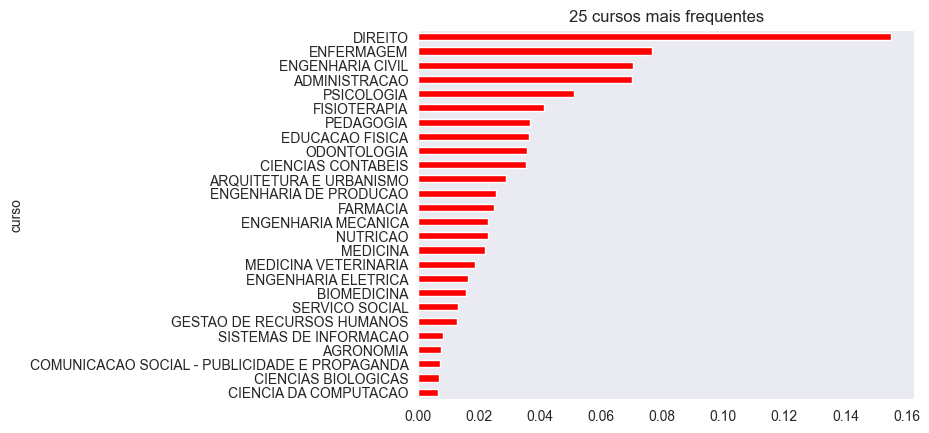

In [32]:
# Calcula e exibe cursos mais frequentemente financiados
freq_curso = df['curso'].value_counts(normalize=True)

freq_curso[25::-1].plot(kind='barh', color='red', 
                        title='25 cursos mais frequentes')

In [33]:
# Calcula a representatividade dos cursos mais frequentes
f'Percentual de pessoas nos 25 cursos mais frequentes:\
{freq_curso[:50].sum() / freq_curso.sum() * 100 : .2f}%'

'Percentual de pessoas nos 25 cursos mais frequentes: 95.07%'

## Safra de entrada

In [34]:
# Investiga safras de entrada presentes na base
df['safra_entrada'].unique()

array(['2013,5', '2014,0', '2012,5', '2013,0', '2010,0', '2011,0',
       '2011,5', '2012,0', '2014,5', '2010,5', '2015,5', '2018,5',
       '2017,0', '2017,5', '2016,0', '2022,5', '2016,5', '2018,0',
       '2021,0', '2019,5', '2015,0', '2021,5', '2019,0', '2020,5',
       '2020,0'], dtype=object)

In [43]:
# Substitui notação para indicação de semestre na safra de entrada
df['safra_entrada'] = df['safra_entrada'].apply(lambda x : x.replace(',0', '.1'))
df['safra_entrada'] = df['safra_entrada'].apply(lambda x : x.replace(',5', '.2'))

np.sort(df['safra_entrada'].unique())

array(['2010.1', '2010.2', '2011.1', '2011.2', '2012.1', '2012.2',
       '2013.1', '2013.2', '2014.1', '2014.2', '2015.1', '2015.2',
       '2016.1', '2016.2', '2017.1', '2017.2', '2018.1', '2018.2',
       '2019.1', '2019.2', '2020.1', '2020.2', '2021.1', '2021.2',
       '2022.2'], dtype=object)

## Data de Nascimento

In [44]:
# Calcula idades a partir das datas de nascimento indicadas
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['idade'] = df['dt_nascimento'].apply(calculate_age)

In [46]:
# Removendo coluna que passa a ser obsoleta
df.drop(
    ['dt_nascimento'], 
    axis=1, 
    inplace=True
)

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='idade', ylabel='Count'>

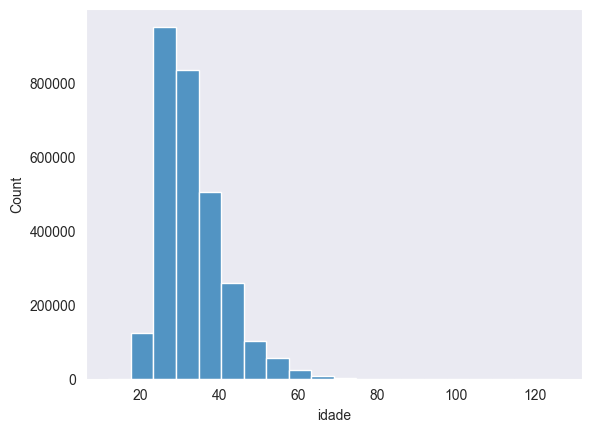

In [45]:
# Exibe histograma de idades
sns.histplot(
    data=df['idade'],
    stat='count',
    bins=20
)

## Renda

In [47]:
# Analisa perfis de renda per capita e familiar
df[['renda_per_capita', 'renda_familiar' ]].describe()

,renda_per_capita,renda_familiar
count,2863276.000,2863276.000
mean,822.680,2180.552
std,609.438,1871.726
min,0.000,0.000
25%,450.000,1000.000
50%,692.770,1600.000
75%,1000.000,2700.000
max,23151.950,89000.000


C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

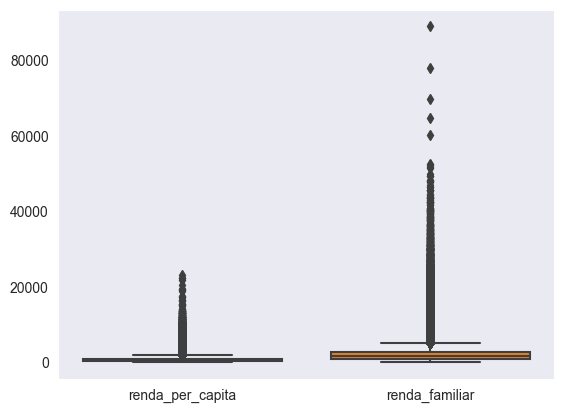

In [51]:
# Exibe gráfico que inclui valores discrepantes inicialmente
sns.boxplot(
    data = df[['renda_per_capita', 'renda_familiar']],
    showfliers=True
)

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

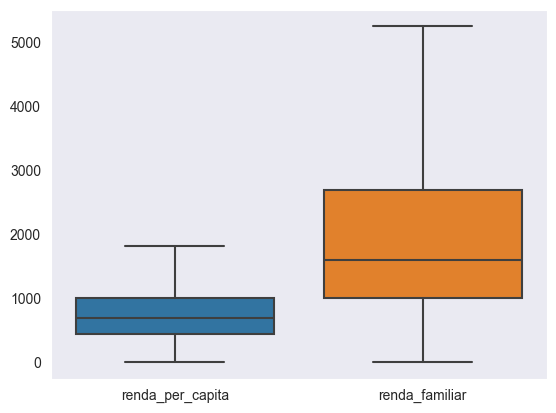

In [50]:
# Exibe gráfico sem valores discrepantes para melhor compreensão dos dados
sns.boxplot(
    data = df[['renda_per_capita', 'renda_familiar']],
    showfliers=False
)

## Nota do ENEM

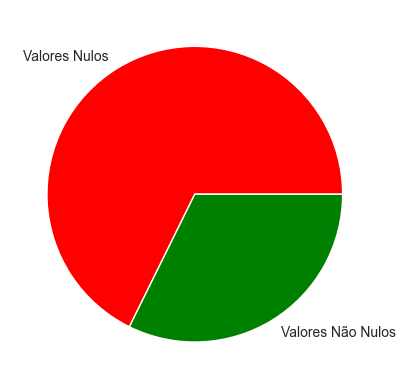

In [52]:
# Mostra percentual de entradas que não possuem nota no ENEM
qto_null = df['vl_nota_enem_considerada'].isnull().sum()
percent_null = qto_null / df['vl_nota_enem_considerada'].size * 100

plt.pie(
    [percent_null, 100 - percent_null],
    labels=['Valores Nulos', 'Valores Não Nulos'],
    colors=['red', 'green']
)
plt.show()

In [53]:
# Cria uma partição da base de dados em que há notas válidas do ENEM
df_enem_existe = df.loc[~df['vl_nota_enem_considerada'].isnull()]
df_enem_existe.head()

,safra_entrada,renda_per_capita,renda_familiar,percentual_solicitado,sexo,cor_raca,estado_civil,uf_curso,curso,tipo_ultimo_aditamento,qtd_semestres_cursados,qtd_semestres_financiados,banco,st_fase_contrato,vl_total_liberado,vl_saldo_devedor,qtd_dias_atraso,vl_saldo_devedor_atrasado,vl_nota_enem_considerada,idade
id_masked,,,,,,,,,,,,,,,,,,,,
49378,2015.2,800.000,1600.000,75.000,F,PARDO,SOLTEIRO,BA,ADMINISTRACAO,Inscricao,1,8,NaN,NaN,NaN,NaN,0,NaN,465.760,40
55562,2018.2,1881.500,3763.000,100.000,F,BRANCO,CASADO,ES,DIREITO,Inscricao,1,10,NaN,NaN,NaN,NaN,0,NaN,620.140,31
169504,2018.2,916.670,2750.000,100.000,M,NEGRO,CASADO,BA,ENGENHARIA MECANICA,Inscricao,1,10,NaN,NaN,NaN,NaN,0,NaN,533.920,37
201790,2017.1,468.500,937.000,79.160,F,PARDO,SOLTEIRO,PA,HISTORIA,Encerramento,1,8,NaN,NaN,NaN,NaN,0,NaN,596.240,24
223848,2017.2,2016.940,8067.760,74.970,F,BRANCO,SOLTEIRO,RS,ENFERMAGEM,Encerramento,1,11,NaN,NaN,NaN,NaN,0,NaN,610.480,24


In [54]:
# Investiga correlação entre nota do ENEM e renda per capita
df_enem_existe['vl_nota_enem_considerada'].corr(df_enem_existe['renda_per_capita'])

0.049022457303997534

Não houve correlação entre as variáveis consideradas.

<Axes: >

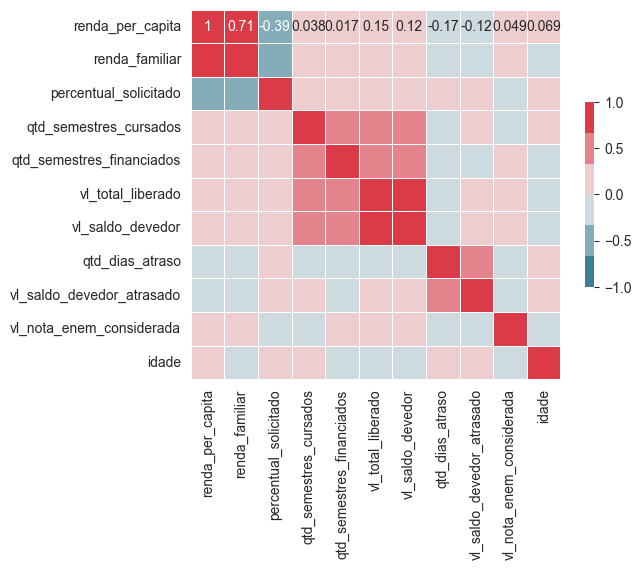

In [55]:
# Investiga demais correlações
# TODO: aqui seria legal mostrar só a diagonal
# TODO: se der, mostrar valores quando as correlações são fortes (+|- que 0.7)
corr_total = df.corr(numeric_only=True)
cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr_total, 
            annot=True, 
            cmap=cmap, 
            vmax=1,
            vmin=-1, 
            center=0, 
            square=True,
            linewidth=.5,
            cbar_kws={"shrink":.5},
           )


<Axes: >

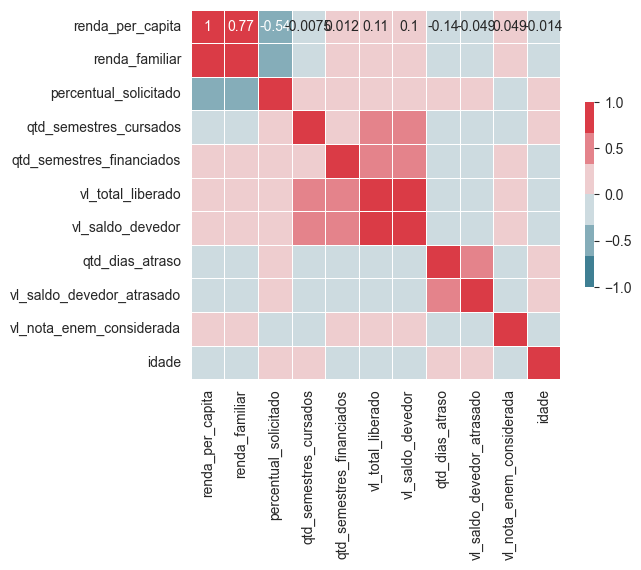

In [56]:
corr_apenas_enem = df_enem_existe.corr(numeric_only=True)
cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr_apenas_enem, 
            annot=True, 
            cmap=cmap, 
            vmax=1,
            vmin=-1, 
            center=0, 
            square=True,
            linewidth=.5,
            cbar_kws={"shrink":.5},
           )

## Percentual Solicitado

In [57]:
df['percentual_solicitado'].value_counts().sort_index(ascending=False)

percentual_solicitado
100.000    1713577
99.420           2
99.380           3
99.370           3
99.350           2
99.340           3
99.330           4
99.320           1
99.300           1
99.280           1
99.270           1
99.260           2
99.250           1
99.240           5
99.230           9
99.220           1
99.210           3
99.190           3
99.180           7
99.170          10
99.160           2
99.150           2
99.140           7
99.130           1
99.120          10
99.110           2
99.100           1
99.090           6
99.080           4
99.070           3
99.060           8
99.050           7
99.040           5
99.030           7
99.020           3
99.010           3
99.000          10
98.990           6
98.980           4
98.970           5
98.960           6
98.950           3
98.940           3
98.930          11
98.920           4
98.910           3
98.900           3
98.890           5
98.880           2
98.870          11
            ...   
11.990   

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='percentual_solicitado', ylabel='Count'>

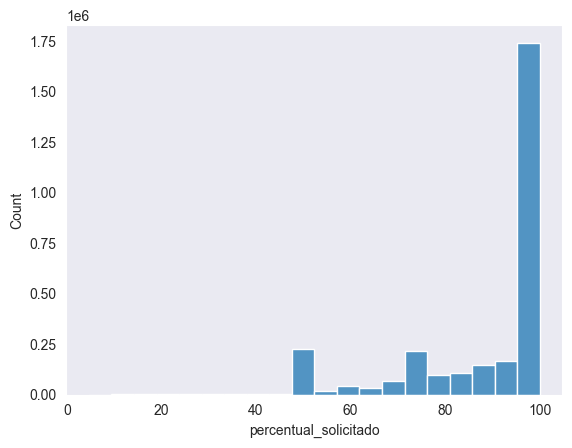

In [58]:
# Distribuição dos percentuais de financiamento solicitados
sns.histplot(
    data=df['percentual_solicitado'],
    stat='count',
    bins=20
)

In [60]:
# Cria categorias para distribuição dos percentuais solicitados
cat_percent = pd.cut(df['percentual_solicitado'], 
    bins=[df['percentual_solicitado'].min(), 60, 80, 100, 1000], 
    labels=['< 60%', '< 80%', '< 100%', '= 100%'],
    right=False    
)
cat_percent

id_masked
654        = 100%
968        = 100%
1067       = 100%
2214       = 100%
2298       = 100%
2790       = 100%
3074       = 100%
3574        < 60%
3902       = 100%
3964        < 80%
4330       = 100%
4557        < 60%
5112       = 100%
5507       = 100%
6796       = 100%
7171       = 100%
10689      = 100%
12946      = 100%
14773      = 100%
15315       < 80%
15432      = 100%
16391      < 100%
16473      = 100%
17278      = 100%
17785      = 100%
18831      < 100%
19605       < 80%
19719      = 100%
20969      = 100%
21299      = 100%
22055      = 100%
24040      = 100%
24889      = 100%
28656      = 100%
28838       < 60%
32471       < 80%
34594      = 100%
35739      = 100%
35975      = 100%
36576      = 100%
39995       < 60%
40097       < 80%
41331      = 100%
41687      = 100%
42369      = 100%
44476      = 100%
45248       < 80%
45824       < 80%
46562       < 80%
47192       < 60%
            ...  
2864489    = 100%
2864490    = 100%
2864491    = 100%
2864492    = 100%


In [61]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


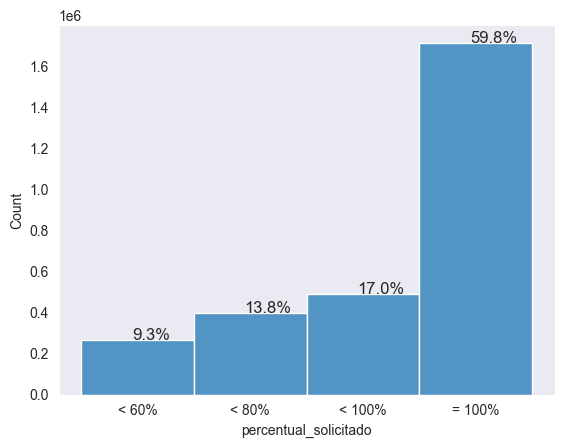

In [62]:
# Dsitribuição de acordo com os percentuais financiados
ax = sns.histplot(
    data=cat_percent,

)
without_hue(ax, cat_percent)

## Sexo

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

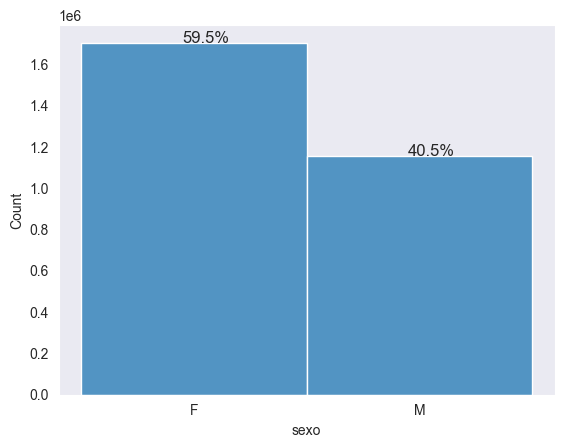

In [63]:
# Distribuição de acordo com sexo
# TODO: retirar notação científica do eixo vertical
ax = sns.histplot(
    data=df['sexo'],
    stat='count'
)

without_hue(ax, df['sexo'])

## Cor/Raça

No Censo, O IBGE usa somente 5 categorias fechadas para a pergunta sobre Cor/Raça.

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

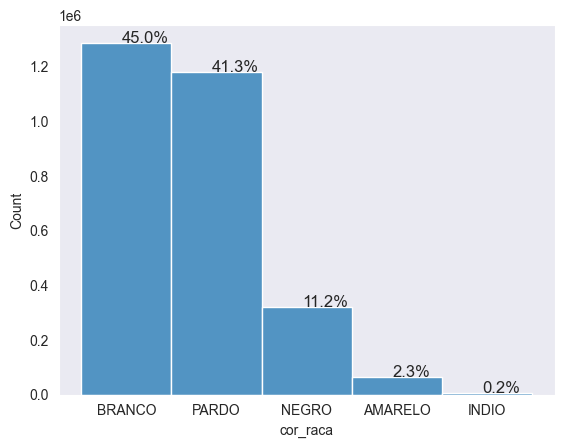

In [64]:
ax = sns.histplot(
    data=df['cor_raca'],
    stat='count'
)

without_hue(ax, df['cor_raca'])

## Estado Civil

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

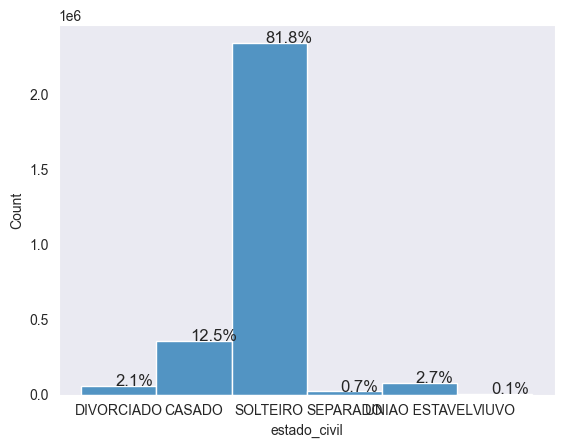

In [66]:
# TODO: colocar rótulos do eixo horizontal na diagonal para melhorar a leitura
ax = sns.histplot(
    data=df['estado_civil'],
    stat='count'
)

without_hue(ax, df['estado_civil'])

## Banco do Financiamento

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

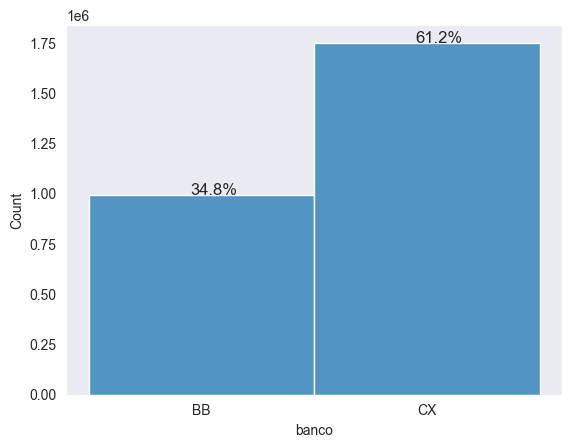

In [67]:
ax = sns.histplot(
    data=df['banco'],
    stat='count'
)

without_hue(ax, df['banco'])

## Valor total liberado

In [68]:
# Quantidade de linhas sem informação sobre 'Valor total liberado'
df['vl_total_liberado'].isna().sum()

115156

In [69]:
# Percentual de linhas sem informação sobre 'Valor total liberado'
perc = df['vl_total_liberado'].isna().sum() / len(df.index)
print(f'{(perc * 100):.1f}%')

4.0%


### (esses valores parecem muito estranhos...)

C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='vl_total_liberado', ylabel='Count'>

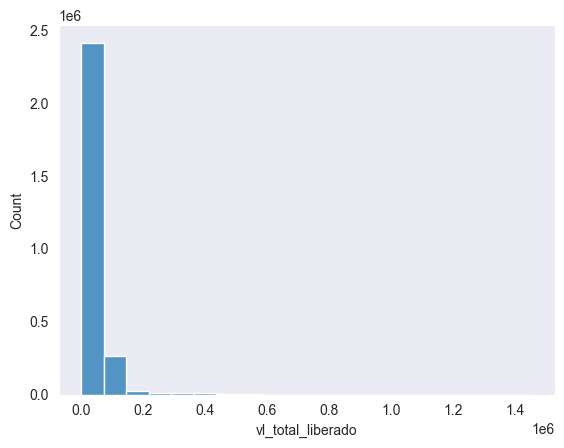

In [70]:
sns.histplot(
    data=df['vl_total_liberado'].dropna(),
    stat='count',
    bins=20
)

In [ ]:
cat_percent = pd.cut(df['vl_total_liberado'].dropna(), 
    bins=5, 
    right=False    
)
cat_percent

## Número de Dias em Atraso

In [ ]:
# Quantidade de linhas sem informação sobre 'Número de Dias em Atraso'
df['qtd_dias_atraso'].isna().sum()

In [ ]:
sns.histplot(
    data=df['qtd_dias_atraso'],
    stat='count',
    bins=20
)

In [ ]:
cat_percent = pd.cut(df['qtd_dias_atraso'], 
    bins=[df['qtd_dias_atraso'].min(), 1, 1000, 2000, 8000], 
    labels=['< 1', '< 1000', '< 2000', '>= 2000'],
    right=False    
)
cat_percent

In [ ]:
ax = sns.histplot(
    data=cat_percent,

)
without_hue(ax, cat_percent)

Falta fazer isso:

6. vl_saldo_devedor
7. vl_saldo_devedor_atrasado

# Removendo outliers

1. Remover idades estranhas

In [ ]:
df['idade'].describe()

In [ ]:
df.loc[df['idade'].idxmax()]

In [ ]:
df = df.loc[df['idade'] <= 80]

df['idade'].describe()